**Machine Learning Model 3**
* House Price Prediction

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [62]:
house_ka_dataset = pd.read_csv('/content/HousingData.csv')

In [63]:
house_ka_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [64]:
house_ka_dataset.shape

(506, 14)

In [65]:
house_ka_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [66]:
# Printing the features (column names) of the dataset
print("Features of the dataset:")
print(house_ka_dataset.columns)

Features of the dataset:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [67]:
house_ka_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [68]:
# Rename a specific column, e.g., renaming 'OLD_COLUMN_NAME' to 'NEW_COLUMN_NAME'
house_ka_dataset.rename(columns={'MEDV': 'Price'}, inplace=True)


In [69]:
#check for missing values
house_price_dataset.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [70]:
house_price_dataset = house_price_dataset.fillna(house_price_dataset.median())

In [71]:
print(house_price_dataset.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


Understanding the correlation between various features in the dataset.

* 1.Positive Correlation
* 2.Negative Correlation

In [72]:
correlation = house_price_dataset.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.185359,0.392632,-0.055585,0.410971,-0.220045,0.343427,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437417
ZN,-0.185359,1.000000,-0.507304,-0.032992,-0.498619,0.312295,-0.535341,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.398838
INDUS,0.392632,-0.507304,1.000000,0.054693,0.738387,-0.377978,0.614248,-0.698621,0.592735,0.716267,0.385366,-0.354840,0.564508
CHAS,-0.055585,-0.032992,0.054693,1.000000,0.070867,0.106797,0.074984,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047279
NOX,0.410971,-0.498619,0.738387,0.070867,1.000000,-0.302188,0.711864,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.573040
RM,-0.220045,0.312295,-0.377978,0.106797,-0.302188,1.000000,-0.239518,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.604323
AGE,0.343427,-0.535341,0.614248,0.074984,0.711864,-0.239518,1.000000,-0.724354,0.447088,0.498408,0.261826,-0.268029,0.575022
DIS,-0.366025,0.632428,-0.698621,-0.092318,-0.769230,0.205246,-0.724354,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483244
RAD,0.601224,-0.300061,0.592735,-0.003339,0.611441,-0.209847,0.447088,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.467765
TAX,0.560469,-0.304385,0.716267,-0.035822,0.668023,-0.292048,0.498408,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524156


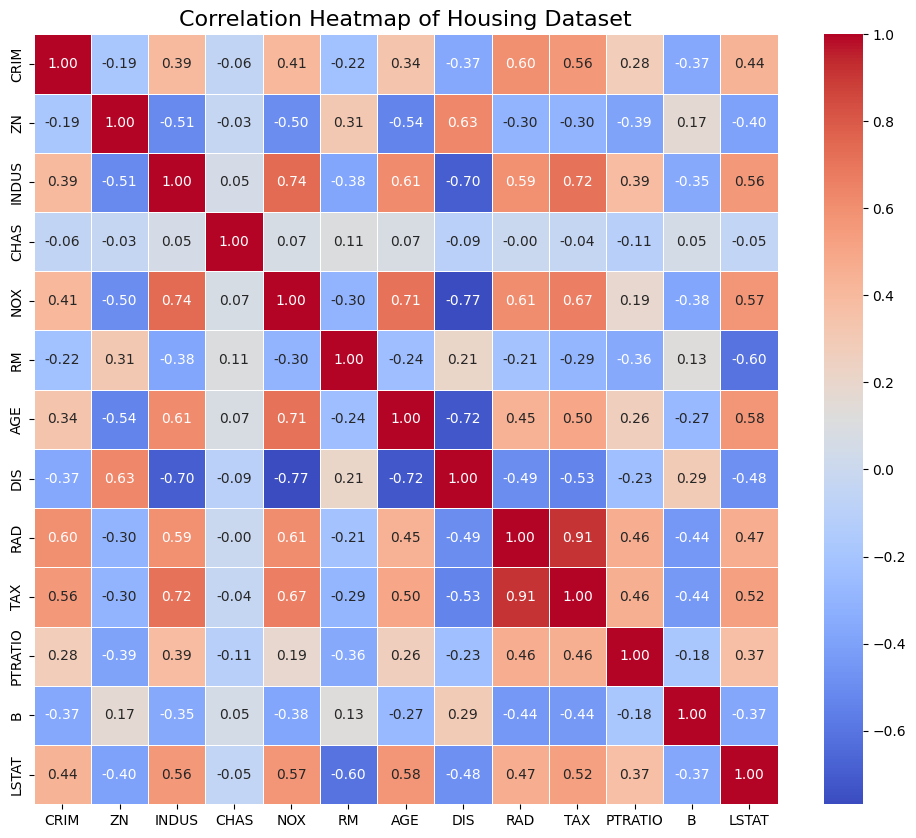

In [73]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Heatmap of Housing Dataset', fontsize=16)

# Show the plot
plt.show()

In [74]:
house_price_dataset = house_ka_dataset.drop(['Price'], axis=1)
house_price_target = house_ka_dataset['Price']

print(house_price_dataset)
print(house_price_target)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

Splitting the Data into Training and Test Data

In [75]:
X_train , X_test , Y_train ,Y_test = train_test_split(house_price_dataset , house_price_target , test_size=0.2 , random_state=2)

In [77]:
print(house_price_dataset.shape ,X_train.shape ,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

Using XGBoost Regression Model

In [78]:
# loading the model
model = XGBRegressor()

In [79]:
#training the model with X_train
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on Training Data

In [80]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)
testing_data_prediction =model.predict(X_test)

print(training_data_prediction)

[23.10556   20.995161  20.098679  34.694107  13.90913   13.503013
 21.991356  15.19639   10.901248  22.69718   13.810051   5.5994563
 29.803614  49.997128  34.89243   20.59913   23.397764  19.208693
 32.69327   19.599798  26.990992   8.401674  46.004715  21.697937
 27.07413   19.372515  19.290953  24.80479   22.600445  31.683664
 18.527308   8.700464  17.40693   23.698957  13.300282  10.498531
 12.704187  25.011072  19.698133  14.903836  24.199064  24.99671
 14.903162  16.99955   15.596944  12.703466  24.515984  15.002214
 49.998177  17.514849  21.200884  32.014084  15.601433  22.900557
 19.30743   18.713701  23.301996  37.197086  30.099365  33.101482
 21.000624  49.986263  13.402558   5.005925  16.504436   8.400528
 28.684137  19.482313  20.600052  45.402576  39.801155  33.39976
 19.80939   33.399323  25.28783   49.995678  12.51284   17.42555
 18.59748   22.592402  49.99892   23.790628  23.307434  23.098652
 41.706337  16.106485  31.619875  36.09759    7.0018873 20.399048
 19.99105   

In [83]:
#R squared error
score_1 = metrics.r2_score(Y_train , training_data_prediction)
score_2 = metrics.r2_score(Y_test , testing_data_prediction)

print(score_1)
print(score_2)

0.9999987142043713
0.8948011220086851


In [85]:
#Mean Absolute Error
score_3 = metrics.mean_absolute_error(Y_train , training_data_prediction)
score_4 = metrics.mean_absolute_error(Y_test , testing_data_prediction)

print(score_3)
print(score_4)

0.007200302700005027
2.087377268660302


Viualise the Actual Price and Predicted Price

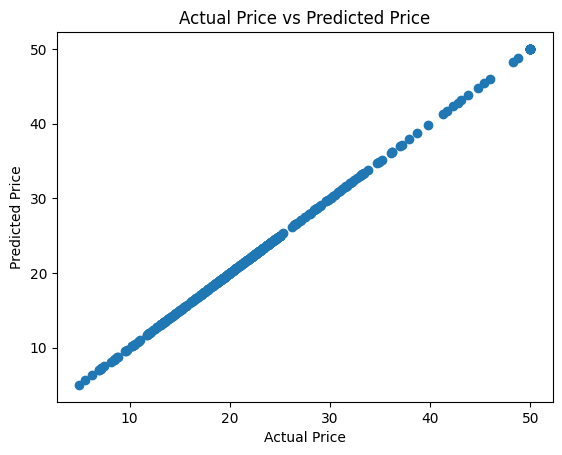

In [87]:
plt.scatter(Y_train , training_data_prediction)
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()